<a href="https://colab.research.google.com/github/Nielspace/Netpuneai-Tutorials/blob/main/Overfitting_Vs_Underfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Model Basics


In [21]:
true_f = lambda X: np.cos(3.5 * np.pi * X)

In [22]:
X = np.sort(np.random.rand(100))

In [23]:
y = true_f(X) + np.random.randn(100) * 0.1

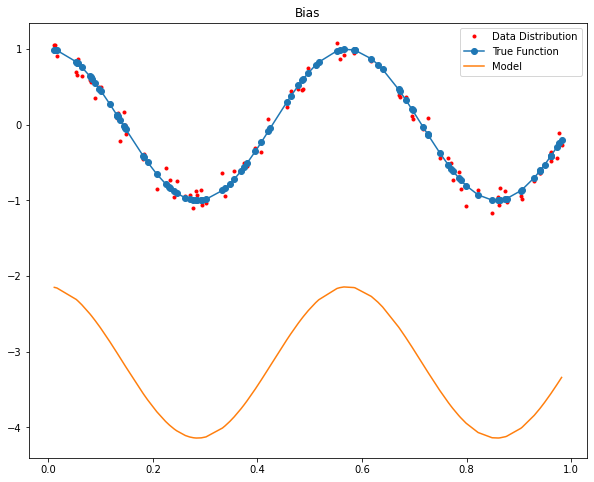

In [32]:
plt.figure(figsize=(10,8))
plt.plot(X,y,'r.', label='Data Distribution')
plt.plot(X, true_f(X), '-o', label='True Function')
plt.plot(X, true_f(X)-np.pi,label='Model' )
plt.title("Bias")
plt.legend()
plt.show()

## Model Capacity


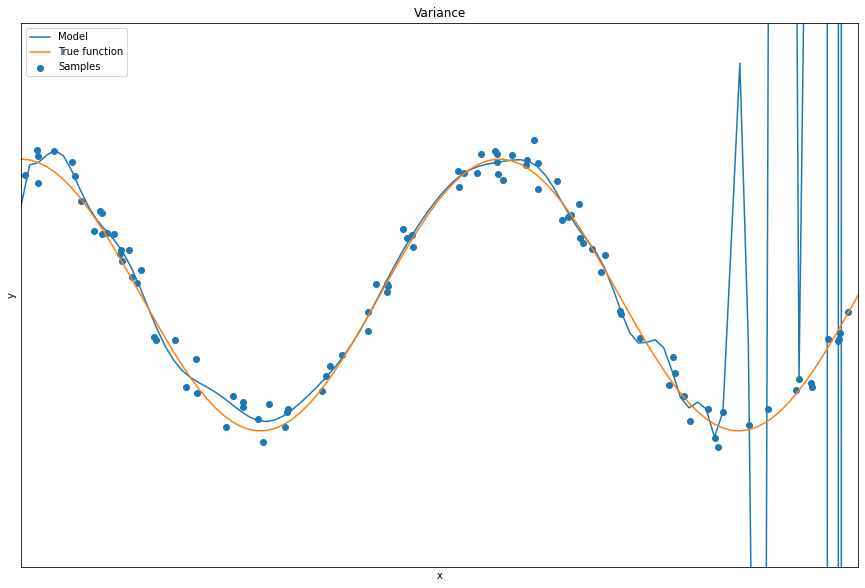

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


np.random.seed(0)

n_samples = 100

degrees = [200]

true_fun = lambda X: np.cos(3.5 * np.pi * X)

X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(15, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                                include_bias=False)
    linear_regression = LinearRegression()

    #creating a structure for operation
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                            ("linear_regression", linear_regression)])
    '''
    fitting the model create parameters'''
    pipeline.fit(X[:, np.newaxis], y)


    #Testing
    X_test = np.linspace(0, 1, 100)
    
    yhat = pipeline.predict(X_test[:, np.newaxis])
    plt.plot(X_test, yhat,label="Model")





    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Variance")
plt.show()


# How Dataset can affect model performance?